In [10]:
# Script name: Assignment 10
# Purpose of script: Assignment 10
# Author: Minh-Thy Tyler
# Date Created: 
# 11/17/2022
# Notes: N/A
# ---------------------------


import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats

# Set up working directory
directory_path = '/Users/minh-thytyler/Desktop/2022-2023/ECON 320/HW' # use / instead of \ or use \ but insert r before (for instance: r'C:\your-directory-path')
os.chdir(directory_path)

## Part 1

In [11]:
# Set up the Data Generating Process


# Set NumPy Seed using birthday
birthday = '08182001'
rng = np.random.RandomState(int(birthday))

#Declare your betas
beta0= 9
beta1= 0
beta2= 2

#Declare alphas
alpha0 = 2
alpha1 = .8

# Calculate y, x and u over 1,000,000 values
x1 = rng.normal(loc = 10, scale=8**.5, size = 1000000)
u = rng.normal(loc = 0, scale= 1**.5, size = 1000000)
ui = rng.normal(loc = 0, scale = 1**.5, size = 1000000)
x2 = alpha0 + alpha1 * x1 + ui
y = beta0 + beta1 * x1 + beta2*x2+ u

# Store in Pandas DataFrame
population_data = pd.DataFrame({'y' : y, 'x1' : x1, 'x2':x2, 'u':u })
population_data.head()

,y,x1,x2,u
0,28.797262,12.655178,10.384526,-0.971789
1,27.604789,8.227826,9.289736,0.025316
2,25.961160,9.531533,8.608115,-0.255070
3,29.100393,10.820223,10.324951,-0.549509
4,30.444764,11.707178,10.230329,0.984107


In [12]:
# Get a sample of 1000 observations (hw did not specify sampling distribution size)
sample_df = population_data.sample(n = 1000, replace= False, random_state = int(birthday))

In [16]:
#obtaining one beta 1 sample
beta_1 = []
beta_1se = []

for i in range(1000):
    sample_df = population_data.sample(n=1000, replace = False, random_state = i)
    reg = smf.ols(formula = 'y~x1 +x2', data = sample_df).fit()
    beta_1.append(reg.params[1])
    beta_1se.append(reg.bse[1])

In [14]:
#picking a random beta value and its standard error in generated array
j = random.randint(0, len(beta_1)-1)

random_coeff = beta_1[j]
random_se = beta_1se[j]

print('the random beta 1 sample coefficient is: ',random_coeff)
print('the random standard error is: ',random_se)

#t-stat
tstat = (random_coeff)/random_se
print('tstat: ',tstat)

the random beta 1 sample coefficient is:  0.007483248510857021
the random standard error is:  0.029451081894930817
tstat:  0.25409078476485625


In [15]:
#finding critical values

cv_1 = stats.t.ppf(1-.1/2,(1000-2-1))*-1

cv_2 = stats.t.ppf(1-.1/2,(1000-2-1))

print('The critical values at the 10% level of significance is:', 
      cv_1, 'and', cv_2)


#tstat test
if tstat < cv_1 or tstat > cv_2:
    print("We reject the null hypothesis that B1 = 0")
else: 
    print("We fail to reject the null hypothesis that B1 = 0")

The critical values at the 10% level of significance is: -1.6463834109167177 and 1.6463834109167177
We fail to reject the null hypothesis that B1 = 0


## Part 2

**Part a**

In [85]:
# Set up the Data Generating Process


# Set NumPy Seed using birthday
birthday = '08182001'
rng = np.random.RandomState(int(birthday))

#Declare your betas
beta0= 9
beta1= 8
beta2= 2

#Declare alphas
alpha0 = 2
alpha1 = .8

# Calculate y, x and u over 1,000,000 values
x1 = rng.normal(loc = 10, scale=8**.5, size = 1000000)
u = rng.normal(loc = 0, scale= 1**.5, size = 1000000)
ui = rng.normal(loc = 0, scale = 1**.5, size = 1000000)
x2 = alpha0 + alpha1 * x1 + ui
y = beta0 + beta1 * x1 + beta2*x2+ u

# Store in Pandas DataFrame
population_datab = pd.DataFrame({'y' : y, 'x1' : x1, 'x2':x2, 'u':u })
population_datab.head()

,y,x1,x2,u
0,130.038685,12.655178,10.384526,-0.971789
1,93.427400,8.227826,9.289736,0.025316
2,102.213423,9.531533,8.608115,-0.255070
3,115.662179,10.820223,10.324951,-0.549509
4,124.102188,11.707178,10.230329,0.984107


**Part b**

In [86]:
#Estimating parameters of a properly specified sample regression function
sample_dfb = population_datab.sample(n= 1000, random_state=int(2052001))
mod = smf.ols(formula='y ~ x1+x2', data=sample_dfb)
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.572e+05
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:03:16   Log-Likelihood:                -1452.5
No. Observations:                1000   AIC:                             2911.
Df Residuals:                     997   BIC:                             2926.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2631      0.134     69.029      0.000       9.000       9.526
x1             8.0129      0.029    276.572      0.000       7.956       8.070
x2             1.9549      0.033     58.735      0.000       1.890       2.020
==============================================================================
Omnibus:                        0.905   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.636   Jarque-Bera (JB):                0.780
Skew:                          -0.011   Prob(JB):                        0.677
Kurtosis:                       3.135   Cond. No.                         60.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
#getting 1000 samples of n=10
beta_1 = []

for i in range(1000):
    sample_df = population_datab.sample(n=10, random_state = i)
    reg = smf.ols(formula = 'y~x1 +x2', data = sample_df).fit()
    beta_1.append(reg.params[1])
reg_b10_df = pd.DataFrame({'beta1':beta_1})
print(reg_b10_df.head())

#obtaining empirical variance
print('variance: ', np.var(reg_b10_df))

      beta1
0  7.502221
1  7.936428
2  8.392956
3  8.548164
4  7.954185
variance:  beta1    0.118965
dtype: float64


In [89]:
#getting 1000 samples of n=100
beta_1 = []

for i in range(1000):
    sample_df = population_datab.sample(n=100, random_state = i)
    reg = smf.ols(formula = 'y~x1 +x2', data = sample_df).fit()
    beta_1.append(reg.params[1])
reg_b100_df = pd.DataFrame({'beta1':beta_1})
print(reg_b100_df.head())

#obtaining empirical variance
print('variance: ', np.var(reg_b100_df))

      beta1
0  7.939666
1  7.885229
2  8.064431
3  8.014634
4  7.949901
variance:  beta1    0.00791
dtype: float64


In [90]:
#getting 1000 samples of n=1000
beta_1 = []

for i in range(1000):
    sample_df = population_datab.sample(n=1000, random_state = i)
    reg = smf.ols(formula = 'y~x1 +x2', data = sample_df).fit()
    beta_1.append(reg.params[1])
reg_b1000_df = pd.DataFrame({'beta1':beta_1})
print(reg_b1000_df.head())

#obtaining empirical variance
print('variance: ', np.var(reg_b1000_df))

      beta1
0  8.052984
1  8.017396
2  8.032494
3  8.016221
4  7.984902
variance:  beta1    0.000771
dtype: float64


In [91]:
#getting 1000 samples of n=10000
beta_1 = []

for i in range(1000):
    sample_df = population_datab.sample(n=10000, random_state = i)
    reg = smf.ols(formula = 'y~x1 +x2', data = sample_df).fit()
    beta_1.append(reg.params[1])
reg_b10000_df = pd.DataFrame({'beta1':beta_1})
print(reg_b10000_df.head())

#obtaining empirical variance
print('variance: ', np.var(reg_b10000_df))

      beta1
0  8.009409
1  8.014641
2  7.992661
3  7.997098
4  8.005200
variance:  beta1    0.000076
dtype: float64


**Part c**

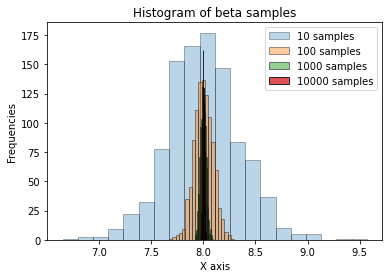

In [92]:
#Creating the histogram, all on one plot
fig, ax = plt.subplots()
ax.hist(reg_b10_df, bins=20, edgecolor='black', alpha=.3, label = '10 samples')
ax.hist(reg_b100_df, bins=20, edgecolor='black', alpha=.4, label = '100 samples')
ax.hist(reg_b1000_df, bins=20, edgecolor='black', alpha=.5, label = '1000 samples')
ax.hist(reg_b10000_df, bins=20, edgecolor='black', alpha=.8,label = '10000 samples')
ax.set_title("Histogram of beta samples")
ax.set_xlabel("X axis")
ax.set_ylabel("Frequencies")
leg = ax.legend();
plt.show()

**Part d**

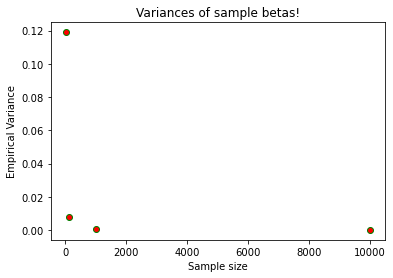

In [93]:
#plot four variances, it is supposed to go down
#putting points in list
x = [10,100,1000,10000]
y = [np.var(reg_b10_df), np.var(reg_b100_df),np.var(reg_b1000_df),np.var(reg_b10000_df)]

#christmas GRAPH!
plt.plot(x, y, color= 'green', linestyle = '', marker='o', markerfacecolor='red')

plt.xlabel('Sample size')

plt.ylabel('Empirical Variance')

plt.title('Variances of sample betas!')

plt.show()

**Advanced-extra credit (talking about d)**

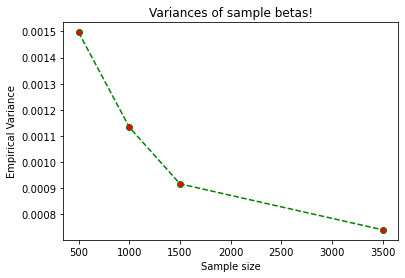

In [94]:
#getting 1000 samples of n=10000
#have a curve on variance plot
beta_1 = []

for i in range(1000):
    sample_df = population_datab.sample(n=500, random_state = i)
    reg = smf.ols(formula = 'y~x1 +x2', data = sample_df).fit()
    beta_1.append(reg.params[1])
reg_b500_df = pd.DataFrame({'beta1':beta_1})
reg_b500_df.head()

for i in range(1000):
    sample_df = population_datab.sample(n=1000, random_state = i)
    reg = smf.ols(formula = 'y~x1 +x2', data = sample_df).fit()
    beta_1.append(reg.params[1])
reg_b1000_df = pd.DataFrame({'beta1':beta_1})
reg_b1000_df.head()

for i in range(1000):
    sample_df = population_datab.sample(n=1500, random_state = i)
    reg = smf.ols(formula = 'y~x1 +x2', data = sample_df).fit()
    beta_1.append(reg.params[1])
reg_b1500_df = pd.DataFrame({'beta1':beta_1})
reg_b1500_df.head()

for i in range(1000):
    sample_df = population_datab.sample(n=3500, random_state = i)
    reg = smf.ols(formula = 'y~x1 +x2', data = sample_df).fit()
    beta_1.append(reg.params[1])
reg_b3500_df = pd.DataFrame({'beta1':beta_1})
reg_b3500_df.head()


x = [500,1000,1500,3500]
y = [np.var(reg_b500_df), np.var(reg_b1000_df),np.var(reg_b1500_df),np.var(reg_b3500_df)]

#christmas GRAPH!
plt.plot(x, y, color= 'green', linestyle = 'dashed', marker='o', markerfacecolor='red')

plt.xlabel('Sample size')

plt.ylabel('Empirical Variance')

plt.title('Variances of sample betas!')

plt.show()

Note: If I made highest sample a higher number like 10,000 instead of 3,500 the curve of this graph will be very similar to that of in c, but my computer is really slow at drawing from higher samples so I left it at 3500